<a href="https://colab.research.google.com/github/Mukhtyarkhan/mealybug_detection/blob/main/mealybug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l1, l2
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
train_data_path = r"/content/drive/MyDrive/mealybug_dataset/Mealybug_train"
validation_data_path = r"/content/drive/MyDrive/mealybug_dataset/Mealybug_test"

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=16,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 66 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'Fresh': 0, 'Mealybug': 1}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=16,
                                  class_mode='binary')

Found 22 images belonging to 2 classes.


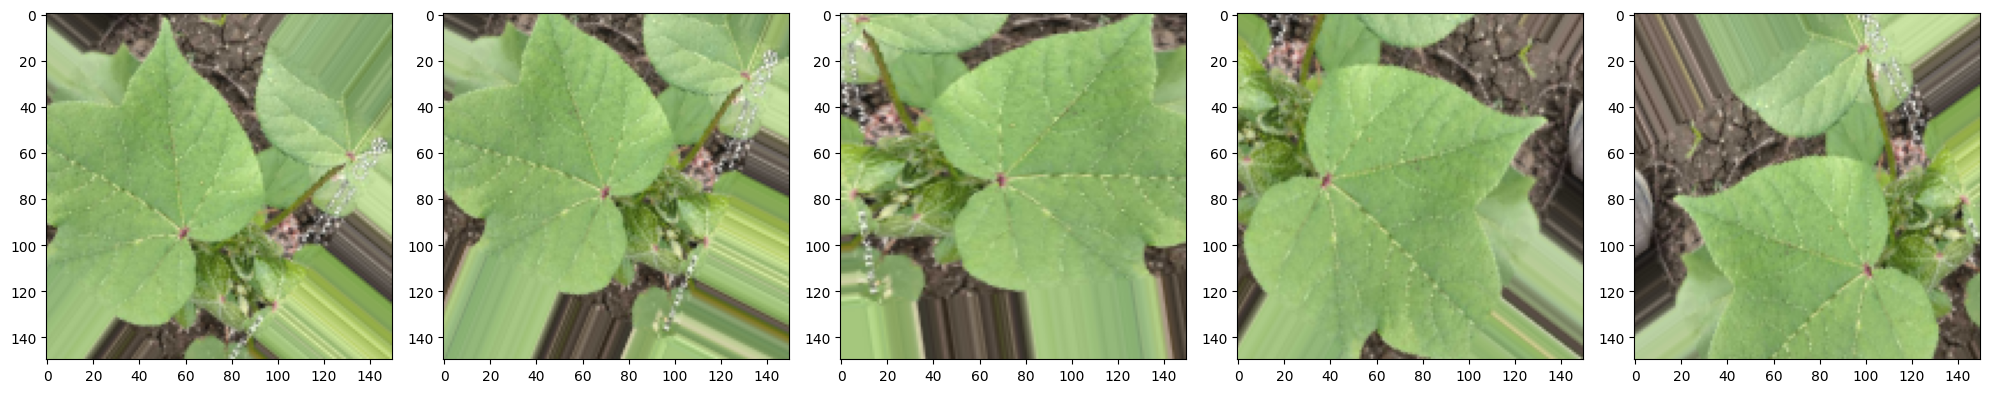

In [ ]:
#showing augmnetd Images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# Save best model using validation accuracy
model_path = '/content/drive/MyDrive/model/best_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)  # Early stopping callback

callbacks_list = [checkpoint, early_stopping]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu', kernel_regularizer=l1(0.001)), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu', kernel_regularizer=l2(0.001)),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=1, activation='sigmoid') # output layer
])


In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# train cnn model
history = cnn_model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          batch_size=16,
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 15.8945 - accuracy: 0.6061
Epoch 1: val_accuracy improved from -inf to 0.45455, saving model to /content/drive/MyDrive/model/best_model.h5
5/5 [==============================] - 10s 2s/step - loss: 15.8945 - accuracy: 0.6061 - val_loss: 13.2996 - val_accuracy: 0.4545
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 12.0821 - accuracy: 0.5758
Epoch 2: val_accuracy improved from 0.45455 to 0.54545, saving model to /content/drive/MyDrive/model/best_model.h5
5/5 [==============================] - 4s 842ms/step - loss: 12.0821 - accuracy: 0.5758 - val_loss: 10.0400 - val_accuracy: 0.5455
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 9.4495 - accuracy: 0.6364
Epoch 3: val_accuracy did not improve from 0.54545
5/5 [==============================] - 5s 1s/step - loss: 9.4495 - accuracy: 0.6364 - val_loss: 8.1338 - val_accuracy: 0.5455
Epoch 4/100
5/5 [==============================] - ETA:

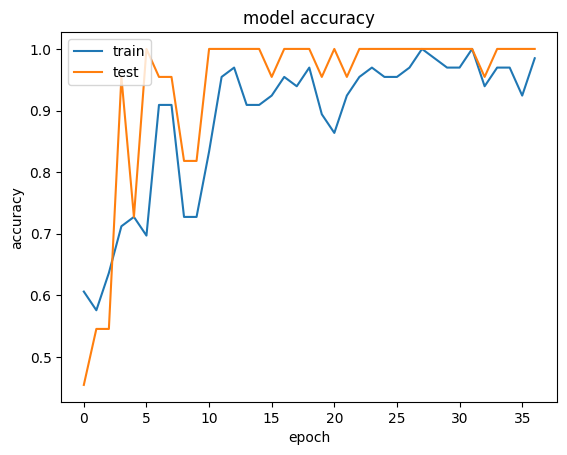

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

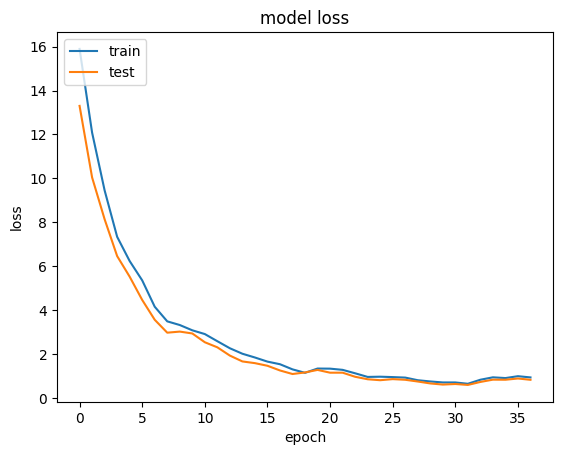

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()